# IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [2]:
# dataframes for both training and testing datasets 
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')

# VISUALIZATION OF THE DATASET

In [3]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train.shape

(60000, 785)

In [5]:
# Creating training and testing arrays
train = np.array(fashion_train, dtype = 'float32')
test = np.array(fashion_test, dtype = 'float32')

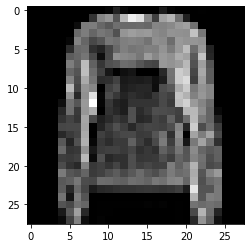

In [6]:
# Viewing some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( train[i,1:].reshape((28,28)), cmap = 'gray' )

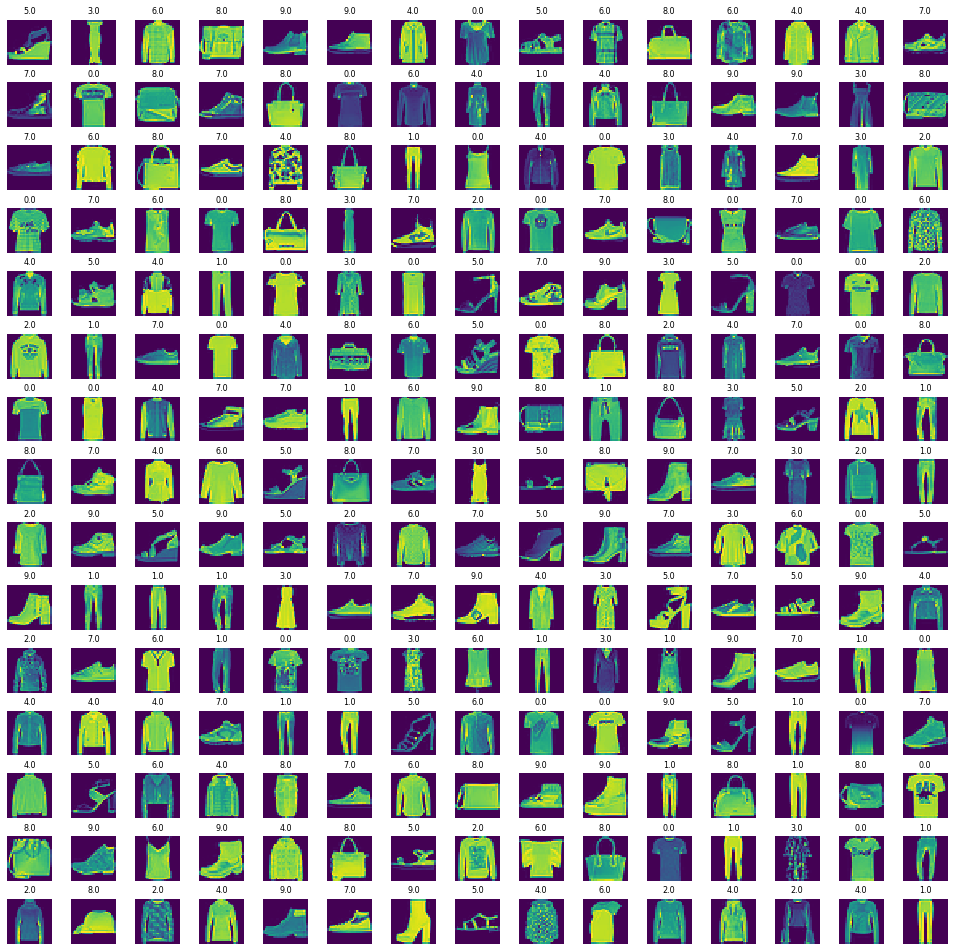

In [7]:
# Viewing more images in a grid format

# Defining the dimensions of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flatening the 15 x 15 matrix into 225 array
n_training = len(train) # geting the length of the training dataset

for i in np.arange(0, W_grid * L_grid):
    # Selecting a random number
    index = np.random.randint(0, n_training)
    # reading and displaying an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    axes[i].set_title(train[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

# TRAINING THE MODEL

In [8]:
# Prepare the training and testing dataset and normalization of X_train and X_test
X_train = train[:, 1:]/255
y_train = train[:, 0]

X_test = test[:,1:]/255
y_test = test[:,0]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [10]:
# reshaping to 28 to 28 like image format, thats how the convolution network accepts the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_validate = X_validate.reshape(X_validate.shape[0], 28, 28, 1)

In [11]:
# Import Keras

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Sequential - Use to initialise the neural network
# Dense Layer - Use to create the layers in the artificial neural network
# Conv2D - Convolutional Layer to filter the imahe
# MaxPooling2D - Max Pooling to reducing size and overfitting
# Flatten - to flatten the image data into a single column
# Adam - optimizer type of stochastic gradiend desent

Using TensorFlow backend.


In [12]:
#Initializing our neural network
cnn_model = Sequential()

#Adding Convolutional Layer to the NN with parameters
# @param 32 - Initializing the feature detectors(kernel) Note: Can be imporved to 64 for better accuracy
# @param 3,3 - Each feature detecor(kernel) dimension
# @param input_shape = 28,28,1 - our image dimension 
# @param activation = 'relu' - rectifire activation(relu) function for non linearity
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28,28,1), activation = 'relu'))


/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  if __name__ == '__main__':


In [13]:
#Adding Pooling Layer to the NN with parameters
# @param pool_size = (2,2) - our pool dimension
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [14]:
#Adding Dropout- It removes inaccurate neurons for better performance
# It is regularization technique for reducing overfitting
cnn_model.add(Dropout(0.25))

In [15]:
#Adding Flatten Layer to the NN with parameters
cnn_model.add(Flatten())

In [16]:
#Adding Hidden Layer to the NN with parameters
# #param 32- input features 
cnn_model.add(Dense(32, activation = 'relu'))

#Adding Output Layer to the NN with parameters
# #param 32- input features 
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [17]:
## Compiling the ANN
# parameter optimizer used 'adam' type of  Stochastic Gradient Descent
# parameter loss  = sparse_categorical_crossentropy - since we are categorizing our outputs into 10 categories.
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [18]:
# Fitting the ANN to the Training set
# @param batch_size = 512 - number of rows when optimize the weights
# @param np_epoch = 100 - number of iterations
# @param verbose = 1 - number of information need while training data 
# @param - Data on which to evaluate the loss and any model metrics at the end of each epoch.
cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = 50, verbose = 1, validation_data = (X_validate, y_validate))

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.8677 - accuracy: 0.6917 - val_loss: 0.4832 - val_accuracy: 0.8277
Epoch 2/50
48000/48000 [==============================] - 20s 407us/step - loss: 0.4551 - accuracy: 0.8383 - val_loss: 0.4212 - val_accuracy: 0.8547
Epoch 3/50
48000/48000 [==============================] - 20s 411us/step - loss: 0.4117 - accuracy: 0.8549 - val_loss: 0.3796 - val_accuracy: 0.8698
Epoch 4/50
48000/48000 [==============================] - 20s 426us/step - loss: 0.3733 - accuracy: 0.8696 - val_loss: 0.3651 - val_accuracy: 0.8736
Epoch 5/50
48000/48000 [==============================] - 20s 414us/step - loss: 0.3519 - accuracy: 0.8771 - val_loss: 0.3512 - val_accuracy: 0.8757
Epoch 6/50
48000/48000 [==============================] - 20s 408us/step - loss: 0.3405 - accuracy: 0.8805 - val_loss: 0.3270 - val_accuracy: 0.8897
Epoch 7/50
48000/48000 [==============================] 

# EVALUATING THE MODEL

In [19]:
# evaluation[0] - loss
# evaluation[1] - accuracy
evaluation = cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 104us/step


In [20]:
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

Test Accuracy : 0.916


In [21]:
# geting the predictions for the test data
predictions = cnn_model.predict_classes(X_test)

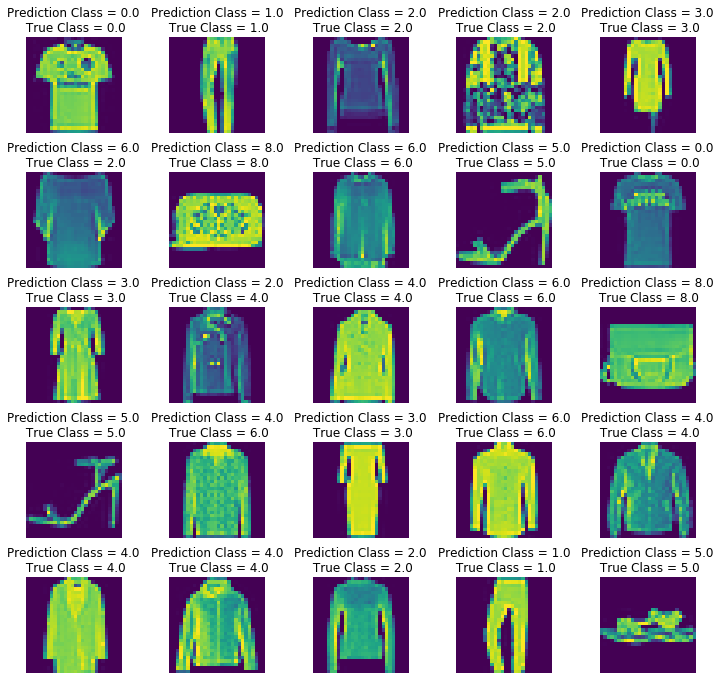

In [22]:
#Showinw images with predictions and actual values
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predictions[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

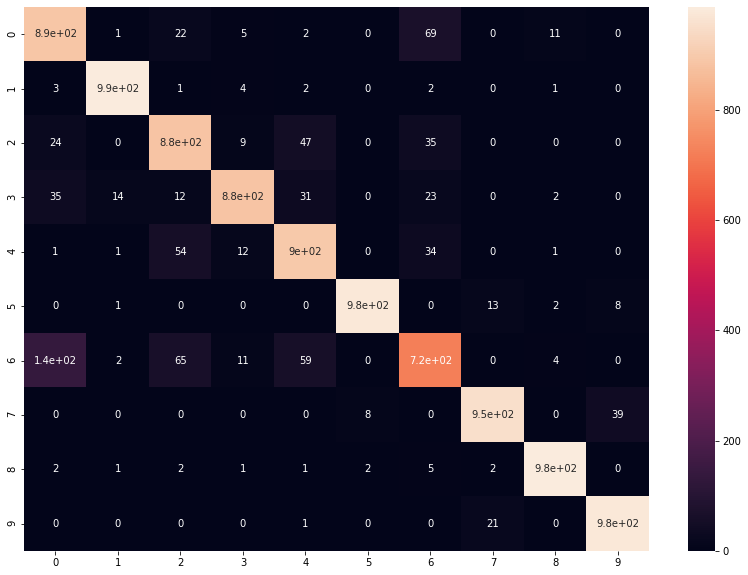

In [23]:
#Reporting the results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm  = confusion_matrix(y_test, predictions)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot=True)

In [24]:
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predictions, target_names = target_names))

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

              precision    recall  f1-score   support

     Class 0       0.82      0.89      0.85      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.85      0.89      0.87      1000
     Class 3       0.95      0.88      0.92      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.72      0.76      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



 Note: The lowest score has Class 6 and 0 which is Shirt ! The model has dificulty to understand shirts and t-shirts
 